<a href="https://colab.research.google.com/github/shcho11/00.ML_Practices_2022_School/blob/main/modeling_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

from sklearn.model_selection import train_test_split

### Titanic Dataset (Titanic - Machine Learning from Disaster)을 사용

In [4]:
# read csv

data = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

#data = pd.read_csv("/content/drive/MyDrive/titanic.csv")

In [5]:
# show head
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.groupby(['Sex','Pclass'])['Pclass'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

## Pie & Histogram : Pclass by Sex

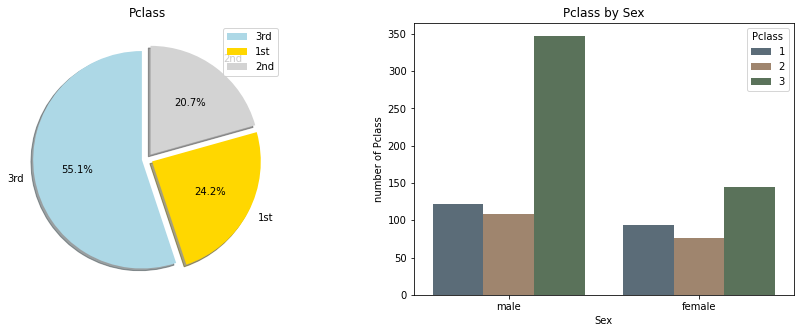

In [ ]:
# Pclass by Sex

#서브플롯 그리기. (1x2, w:15,h:5사이즈의 서브플롯)
fig,ax=plt.subplots(1,2,figsize=(15,5))

#plt 파이차트

labels = ['3rd', '1st', '2nd']
explode = [0.05, 0.05, 0.05]
colors = ['lightblue', 'gold', 'lightgray']

data["Pclass"].value_counts().plot.pie(labels=labels, autopct='%1.1f%%', ax=ax[0], legend=True, shadow=True, startangle=90, explode=explode, colors=colors)
ax[0].set_title('Pclass')
ax[0].set_ylabel('')

#sns 차트
sns.countplot(x='Sex',hue='Pclass',data=data,ax=ax[1], saturation=0.2)
ax[1].set_title('Pclass by Sex')
ax[1].set(xlabel="Sex")
ax[1].set(ylabel="number of Pclass")
plt.show()

## Histogram : Survived vs. Dead by Sex

In [ ]:
#data.groupby(['Sex','Survived'])['Survived'].count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


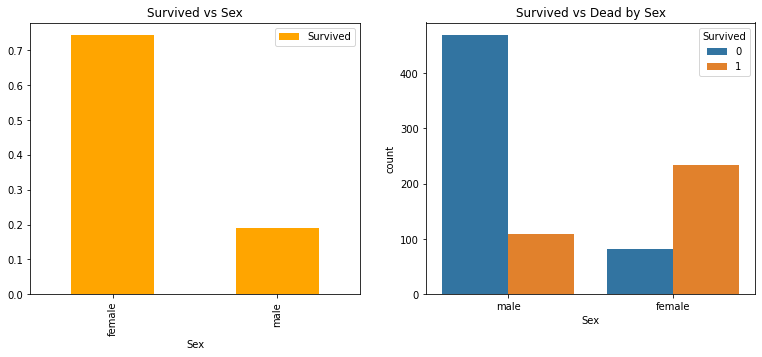

In [ ]:
# Survived vs Dead by Sex

fig,ax=plt.subplots(1,2,figsize=(13,5))

colors1 = ['orange']
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0], color=colors1)
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead by Sex')

plt.show()

## ScatterPlot : Survival Rates by Ages 

In [ ]:
# Survival rates by Ages

age_surv = data[['Age' , 'Survived']].dropna(how='any') #결측값 제거. 
age_surv['Age'] = (np.floor(age_surv['Age'])).astype(int) # age를 '내림'하여 정수로 반환
age_u = age_surv['Age'].unique()

np.sort(age_u)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [ ]:
# Survival rates by Ages
# df_age_surv

df_age_surv = pd.DataFrame(index=age_u, columns=['Survived', 'Deaths', 'Total', 'Percentage']).sort_index()

df_age_surv['Survived'] = age_surv.groupby('Age')['Survived'].sum()
df_age_surv['Total'] = age_surv.groupby('Age').count()
df_age_surv['Deaths'] = df_age_surv['Total'] - df_age_surv['Survived']
df_age_surv['Percentage'] = round(age_surv.groupby('Age')['Survived'].mean() * 100, 1)

df_age_surv

,Survived,Deaths,Total,Percentage
0,7,0,7,100.0
1,5,2,7,71.4
2,3,7,10,30.0
3,5,1,6,83.3
4,7,3,10,70.0
...,...,...,...,...
66,0,1,1,0.0
70,0,3,3,0.0
71,0,2,2,0.0
74,0,1,1,0.0


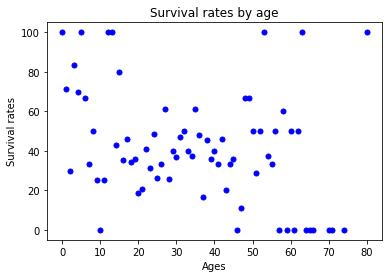

In [ ]:
x = df_age_surv['Percentage'].index
y = df_age_surv['Percentage']

plt.scatter(x, y, c = "blue", s=25)

plt.title("Survival rates by age")
plt.xlabel("Ages")
plt.ylabel("Survival rates")

plt.show()

# Split Dataset

In [8]:
# Dataset을 정의하고 Split 하기.

# drop columns
dataset = data.drop(columns=["PassengerId","Name","Ticket","Cabin"]).copy() # 불필요한 컬럼을 drop하기

# x and y
x = dataset.drop(columns=["Survived"]).copy() # 설명변수
y = dataset["Survived"].copy() # 종속변수

# data split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [9]:
train_x = train_x.reset_index(drop=True)
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,male,4.0,0,2,81.8583,S
1,3,male,NaN,0,0,7.8958,S
2,3,female,1.0,1,1,11.1333,S
3,2,male,36.0,1,2,27.7500,S
4,2,male,43.0,1,1,26.2500,S
...,...,...,...,...,...,...,...
618,3,female,21.0,0,0,7.6500,S
619,1,male,NaN,0,0,31.0000,S
620,3,male,41.0,2,0,14.1083,S
621,1,female,14.0,1,2,120.0000,S


In [10]:
print(train_y.head())
print(train_y.value_counts())

445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64
0    392
1    231
Name: Survived, dtype: int64


# Preprocessing

In [11]:
# 전처리 1. age NaN to Means (by Pclass&Sex)

age_means = train_x.groupby(['Pclass', 'Sex']).agg({'Age': 'mean'}) # Pclass, Sex 별 Age groupby하기 
age_means

Age
Pclass Sex              
1      female  34.741379
       male    40.750000
2      female  27.968085
       male    30.386667
3      female  21.000000
       male    26.645165

In [12]:
train_age = train_x.set_index(['Pclass', 'Sex']).Age.fillna(age_means.Age).copy() # Age 결측값을 Mean값으로 대체해주기.
train_age = pd.DataFrame(train_age.reset_index(drop=True))
train_age.columns = ["Age_prep"]
train_age

,Age_prep
0,4.000000
1,26.645165
2,1.000000
3,36.000000
4,43.000000
...,...
618,21.000000
619,40.750000
620,41.000000
621,14.000000


In [13]:
merge = pd.merge(train_x, train_age, left_index=True, right_index=True, how='left').copy()
prep1 = merge[["Pclass", "Sex", "Age_prep", "SibSp", "Parch", "Fare", "Embarked"]]
prep1.columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
train_x = prep1
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,male,4.000000,0,2,81.8583,S
1,3,male,26.645165,0,0,7.8958,S
2,3,female,1.000000,1,1,11.1333,S
3,2,male,36.000000,1,2,27.7500,S
4,2,male,43.000000,1,1,26.2500,S
...,...,...,...,...,...,...,...
618,3,female,21.000000,0,0,7.6500,S
619,1,male,40.750000,0,0,31.0000,S
620,3,male,41.000000,2,0,14.1083,S
621,1,female,14.000000,1,2,120.0000,S


In [14]:
train_x['Sex'] = train_x['Sex'].map({'male':0, 'female':1}).copy()
test_x['Sex'] = test_x['Sex'].map({'male':0, 'female':1}).copy()
train_x['Embarked'] = train_x['Embarked'].map({'C':0, 'Q':1, 'S':2}).copy() # C: Cherbourg, Q: Queenstown, S: Southampton
test_x['Embarked'] = test_x['Embarked'].map({'C':0, 'Q':1, 'S':2}).copy()
train_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,4.000000,0,2,81.8583,2.0
1,3,0,26.645165,0,0,7.8958,2.0
2,3,1,1.000000,1,1,11.1333,2.0
3,2,0,36.000000,1,2,27.7500,2.0
4,2,0,43.000000,1,1,26.2500,2.0
...,...,...,...,...,...,...,...
618,3,1,21.000000,0,0,7.6500,2.0
619,1,0,40.750000,0,0,31.0000,2.0
620,3,0,41.000000,2,0,14.1083,2.0
621,1,1,14.000000,1,2,120.0000,2.0


In [15]:
train_x["Embarked"].fillna(value=train_x["Embarked"].mode()[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    int64  
 2   Age       623 non-null    float64
 3   SibSp     623 non-null    int64  
 4   Parch     623 non-null    int64  
 5   Fare      623 non-null    float64
 6   Embarked  623 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 34.2 KB


# Encoding and Scaling

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler 

#문자형을 숫자형으로 변환
ordinal_encoder = OrdinalEncoder() 
train_x_encoded = ordinal_encoder.fit_transform(train_x)
test_x_encoded = ordinal_encoder.fit_transform(test_x)

#0과 1 사이로 스케일링하기
minmax_scaler = MinMaxScaler(feature_range=(0,1.))
train_x = pd.DataFrame(minmax_scaler.fit_transform(train_x_encoded)).copy()
test_x = pd.DataFrame(minmax_scaler.fit_transform(test_x_encoded)).copy()

In [18]:
train_x.columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
test_x.columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,0.0,0.086420,0.000000,0.333333,0.883495,1.0
1,1.0,0.0,0.395062,0.000000,0.000000,0.155340,1.0
2,1.0,1.0,0.049383,0.166667,0.166667,0.281553,1.0
3,0.5,0.0,0.580247,0.166667,0.333333,0.597087,1.0
4,0.5,0.0,0.691358,0.166667,0.166667,0.572816,1.0


In [19]:
test_x = test_x.fillna(0)
test_x = test_x.replace(r'^\s*$', 0) # blank를 0으로 대체
test_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.000000,0.25,0.2,0.378788,0.0
1,0.5,0.0,0.484375,0.00,0.0,0.295455,1.0
2,1.0,0.0,0.265625,0.00,0.0,0.196970,1.0
3,0.5,1.0,0.078125,0.00,0.2,0.651515,1.0
4,1.0,1.0,0.171875,0.25,0.0,0.303030,0.0
...,...,...,...,...,...,...,...
263,1.0,0.0,0.406250,0.00,0.0,0.234848,1.0
264,0.0,0.0,0.000000,0.00,0.0,0.000000,1.0
265,0.0,0.0,0.968750,0.00,0.0,0.545455,1.0
266,1.0,0.0,0.218750,0.00,0.0,0.234848,1.0


In [20]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    268 non-null    float64
 1   Sex       268 non-null    float64
 2   Age       268 non-null    float64
 3   SibSp     268 non-null    float64
 4   Parch     268 non-null    float64
 5   Fare      268 non-null    float64
 6   Embarked  268 non-null    float64
dtypes: float64(7)
memory usage: 14.8 KB


# Modeling

In [21]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# Logistic Regression 모델 학습

lrmodel = LogisticRegression()
lrmodel.fit(train_x,train_y)
predictlr_tr = lrmodel.predict(train_x)
predictlr = lrmodel.predict(test_x)

# 모델 평가지표 출력
print("accuracy score(train) : ",(accuracy_score(train_y, predictlr_tr)))

print(confusion_matrix(test_y, predictlr))
print(classification_report(test_y, predictlr))
print("accuracy score(test) : ",(accuracy_score(test_y, predictlr)))

print(f'R2 : {r2_score(test_y, predictlr)}')
print(f'MSE : {r2_score(test_y, predictlr)}')
print(f'RMSE : {r2_score(test_y, predictlr)}')

accuracy score(train) :  0.8025682182985554
[[133  24]
 [ 28  83]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.78      0.75      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

accuracy score(test) :  0.8059701492537313
R2 : 0.20032134044872896
MSE : 0.20032134044872896
RMSE : 0.20032134044872896


In [ ]:
# Decision Tree 모델 학습

dtmodel=DecisionTreeClassifier()
dtmodel.fit(train_x,train_y)
predictdt_tr = dtmodel.predict(train_x)
predictdt = dtmodel.predict(test_x)

# 모델 평가지표 출력
print("accuracy score(train) : ",(accuracy_score(train_y, predictdt_tr)))

print(confusion_matrix(test_y, predictdt))
print(classification_report(test_y, predictdt))
print("accuracy score(test) : ",(accuracy_score(test_y, predictdt)))

accuracy score(train) :  0.9791332263242376
[[102  55]
 [ 37  74]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       157
           1       0.57      0.67      0.62       111

    accuracy                           0.66       268
   macro avg       0.65      0.66      0.65       268
weighted avg       0.67      0.66      0.66       268

accuracy score(test) :  0.6567164179104478


In [ ]:
# 랜덤포레스트 모델 학습 (하이퍼파라미터 튜닝 이전)

rfmodel=RandomForestClassifier(n_estimators=100)
rfmodel.fit(train_x,train_y)
predictrf_tr = rfmodel.predict(train_x)
predictrf = rfmodel.predict(test_x)

# 모델 평가지표 출력
print("accuracy score(train) : ",(accuracy_score(train_y, predictrf_tr)))

print(confusion_matrix(test_y, predictrf))
print(classification_report(test_y, predictrf))
print("accuracy score(test) : ",(accuracy_score(test_y, predictrf)))

accuracy score(train) :  0.9791332263242376
[[111  46]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.74       157
           1       0.64      0.73      0.68       111

    accuracy                           0.72       268
   macro avg       0.71      0.72      0.71       268
weighted avg       0.73      0.72      0.72       268

accuracy score(test) :  0.7164179104477612


In [ ]:
# Linear-SVM 모델 학습

svmodel=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
svmodel.fit(train_x,train_y)
predictsv_tr = svmodel.predict(train_x)
predictsv = svmodel.predict(test_x)

# 모델 평가지표 출력
print("accuracy score(train) : ",(accuracy_score(train_y, predictsv_tr)))

print(confusion_matrix(test_y, predictsv))
print(classification_report(test_y, predictsv))
print("accuracy score(test) : ",(accuracy_score(test_y, predictsv)))

accuracy score(train) :  0.7849117174959872
[[134  23]
 [ 33  78]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

accuracy score(test) :  0.7910447761194029


In [ ]:
# KNN 모델 학습

knmodel=KNeighborsClassifier() 
knmodel.fit(train_x,train_y)
predictkn_tr = knmodel.predict(train_x)
predictkn = knmodel.predict(test_x)

# 모델 평가지표 출력
print("accuracy score(train) : ",(accuracy_score(train_y, predictkn_tr)))

print(confusion_matrix(test_y, predictkn))
print(classification_report(test_y, predictkn))
print("accuracy score(test) : ",(accuracy_score(test_y, predictkn)))

accuracy score(train) :  0.8651685393258427
[[127  30]
 [ 35  76]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       157
           1       0.72      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

accuracy score(test) :  0.7574626865671642


# Hyperparameters Tuning

In [ ]:
rfmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4, 8, 12, 16],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300, 400]
}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, n_jobs = -1)

# Fitting
grid_search.fit(train_x, train_y)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [22]:
# 랜덤포레스트 모델 학습 (하이퍼파라미터 튜닝 이후)

trfmodel=RandomForestClassifier(n_estimators=200, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=4)
trfmodel.fit(train_x,train_y)
predicttrf_tr = trfmodel.predict(train_x)
predicttrf = trfmodel.predict(test_x)

# 모델 평가지표 출력
print("accuracy score(train) : ",(accuracy_score(train_y, predicttrf_tr)))

print(confusion_matrix(test_y, predicttrf))
print(classification_report(test_y, predicttrf))
print("accuracy score(test) : ",(accuracy_score(test_y, predicttrf)))

accuracy score(train) :  0.8812199036918138
[[132  25]
 [ 29  82]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.74      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

accuracy score(test) :  0.7985074626865671


# Cross Validation
<ul>
  <li> K Fold 교차검증은 데이터셋을 K개 subset으로 나누는 것</li>
  <li> k=5라면, 1개의 testset과 4개의 trainset으로 구성</li>
  <li> 매 반복마다 testing part를 바꾸고, 새로운 training parts에 대해 학습하는 과정을 반복</li>
  <li> Accuracy와 Errors는 각 parts의 평균으로 구해짐.</li>
  <li> 어떤 알고리즘은 underfit, 어떤 알고리즘은 overfit 될 수 있으므로, 교차검증을 통해 정규화 모델(generalised model)을 획득할 수 있음.
</ul>

<img src = "https://velog.velcdn.com/images%2Frecoder%2Fpost%2F9a142700-c8c9-4623-8cb5-737acdaa36d4%2Fimage.png" height=400>

In [25]:
from sklearn.model_selection import KFold #K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Random Forest','Linear Svm','KNN']

models=[RandomForestClassifier(n_estimators=100),svm.SVC(kernel='linear'),KNeighborsClassifier(n_neighbors=9)]

for i in models:
    model = i
    cv_result = cross_val_score(model, train_x, train_y, cv=kfold, scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

newmodels_df = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
newmodels_df

,CV Mean,Std
Random Forest,0.808858,0.058176
Linear Svm,0.784946,0.045246
KNN,0.812186,0.031467
